# **Heart Failure Prediction!**

In this Notebook we will see how to apply KNN and how to use H2o.ai automl library for classification task. If you find this notebook usefull please Upvote!

In [1]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#importing dataset
df=pd.read_csv('../input/heart-failure-prediction/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.shape

(918, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
df.isnull().sum()
#There is no null values

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# Data Exploration


 Now we can plot the distribution of data wrt dependent variable i.e HeartDisease

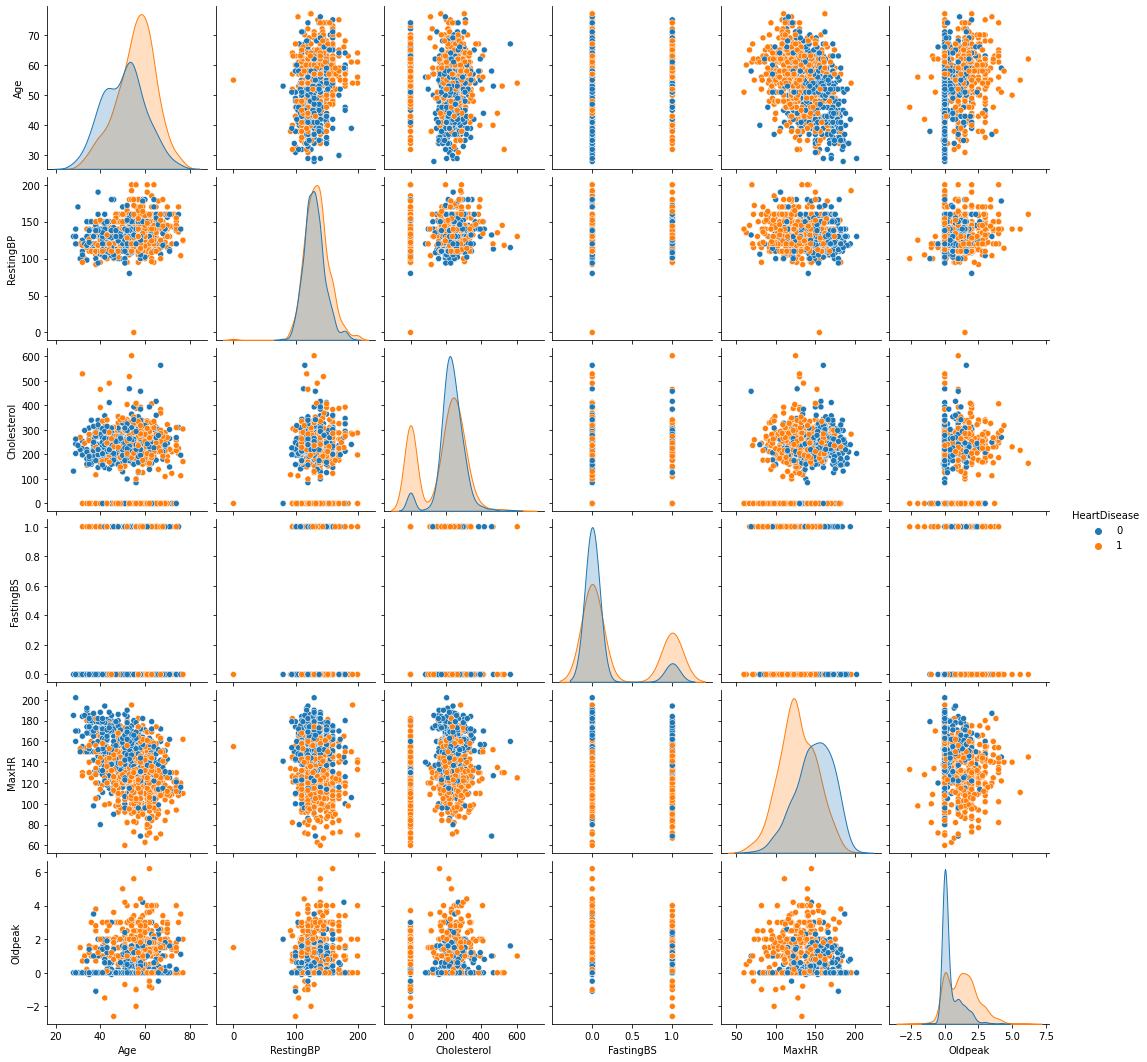

In [7]:
sns.pairplot(df,hue='HeartDisease')


  5. Which are most useful variable in classification? Prove using correlation.

In [8]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


Text(0.5, 1.0, 'Age Distribution')

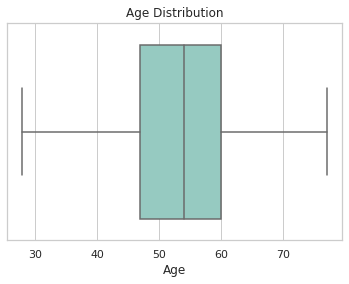

In [9]:
sns.set_theme(style="whitegrid")
sns.boxplot(x="Age", data=df, palette="Set3")
plt.title("Age Distribution")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RestingBP'}>,
        <AxesSubplot:title={'center':'Cholesterol'}>],
       [<AxesSubplot:title={'center':'FastingBS'}>,
        <AxesSubplot:title={'center':'MaxHR'}>,
        <AxesSubplot:title={'center':'Oldpeak'}>],
       [<AxesSubplot:title={'center':'HeartDisease'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

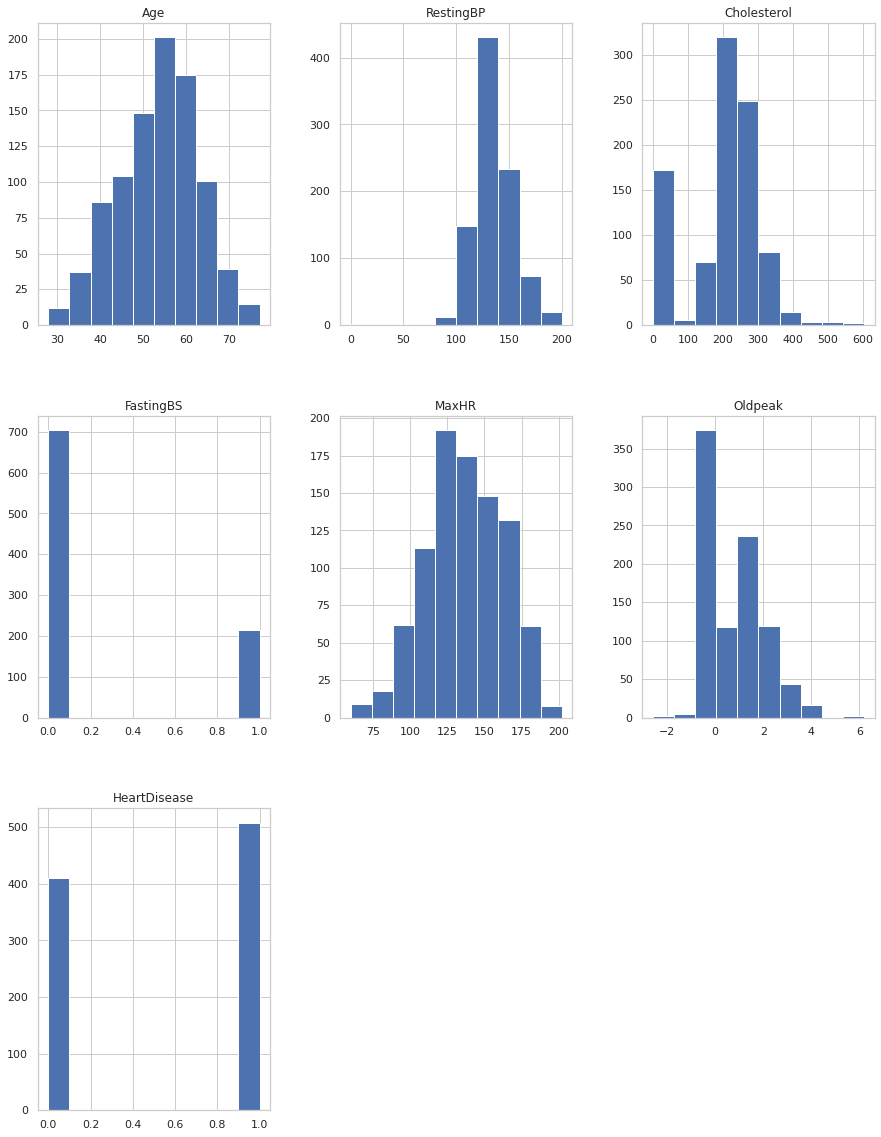

In [10]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

Text(0.5, 1.0, 'Heart Diseases')

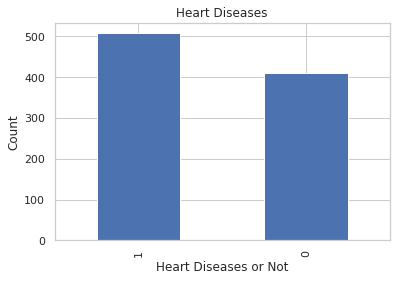

In [11]:
df.HeartDisease.value_counts().plot(kind='bar')
plt.xlabel("Heart Diseases or Not")
plt.ylabel("Count")
plt.title("Heart Diseases")
#Here we can see that dataset is not much imbalanced so there is no need to balance.

# Data Preprocessing

In [12]:
cat = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']

In [13]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df[cat] = df[cat].apply(lb.fit_transform)


In [14]:
X=df.drop('HeartDisease',axis=1)
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2


In [15]:
y=df['HeartDisease']
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)


In [17]:
X_train.shape

(734, 11)

In [18]:
from sklearn.preprocessing import QuantileTransformer
scaler=QuantileTransformer()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2370: UserWarning: n_quantiles (1000) is greater than the total number of samples (734). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


# Using KNN

K-nearest neighbors (KNN) algorithm is a type of supervised ML algorithm which can be used for both classification as well as regression predictive problems. However, it is mainly used for classification predictive problems in industry. The following two properties would define KNN well −

* Lazy learning algorithm − KNN is a lazy learning algorithm because it does not have a specialized training phase and uses all the data for training while classification.

* Non-parametric learning algorithm − KNN is also a non-parametric learning algorithm because it doesn’t assume anything about the underlying data.

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn=KNeighborsClassifier(n_neighbors=5,metric='euclidean',p=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [21]:
y_pred=knn.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1])

In [22]:
knn.score(X_test,y_test)

0.8586956521739131

In [23]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [24]:
metrics.accuracy_score(y_test,y_pred)

0.8586956521739131

In [25]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
mat

array([[64, 13],
       [13, 94]])

In [26]:
from sklearn.metrics import classification_report
target_names = ['Heart Diseases', 'Normal']
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

Heart Diseases       0.83      0.83      0.83        77
        Normal       0.88      0.88      0.88       107

      accuracy                           0.86       184
     macro avg       0.85      0.85      0.85       184
  weighted avg       0.86      0.86      0.86       184



To select optimize k value we will use elbow method

In [27]:
#For selecting K value
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

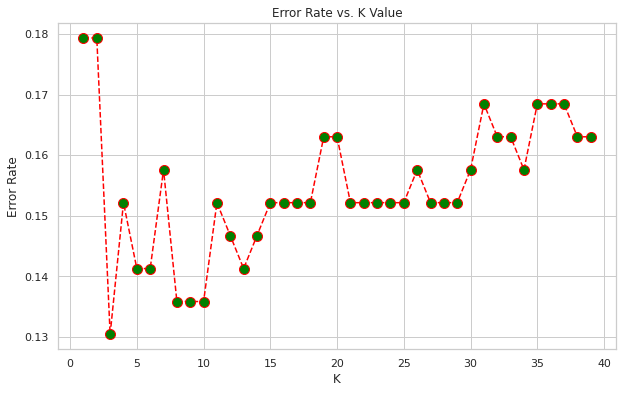

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='red', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [29]:
#From graph we can see that optimize k value is 16,17,18
# Now we will train our KNN classifier with this k values

knn=KNeighborsClassifier(n_neighbors=3,metric='euclidean',p=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [30]:
y_pred=knn.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1])

In [31]:
knn.score(X_test,y_test)

0.8695652173913043

<AxesSubplot:>

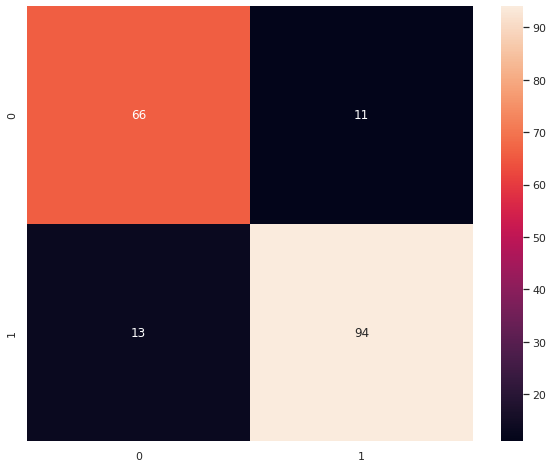

In [32]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(mat, annot=True)

In [33]:
from sklearn.metrics import classification_report
target_names = ['Diabetes', 'Normal']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Diabetes       0.84      0.86      0.85        77
      Normal       0.90      0.88      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



6. Quantify goodness of your model and discuss steps taken for improvement.

    For this dataset KNN had archive 87% accuracy. We can further improve accuracy by using bagging and boosting techniques.

7. Can we use KNN for regression also? Why / Why not?

    KNN algorithm can be used for both classification and regression problems. The KNN algorithm uses ‘feature similarity’ to predict the values of any new data points. This means that the new point is assigned a value based on how closely it resembles the points in the training set.

8. Discuss drawbacks of algorithms such as KNN
  
    -> It does not work well with large dataset and high dimensional dataset.

    -> Knn is noise sensitive dataset, we need to do feature engineering like outlier removal, handling missing value,etc.

    -> Require high memory – need to store all of the training data

    -> Given that it stores all of the training, it can be computationally expensive


# Using H2o.ai AutoML

In [34]:
!pip install h2o

In [35]:
import h2o
# We will be using default parameter Here with H2O init method
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.20.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.20.04, mixed mode, sharing)
  Starting server from /opt/conda/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpagom838p
  JVM stdout: /tmp/tmpagom838p/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpagom838p/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.34.0.3
H2O_cluster_version_age:,3 months and 7 days
H2O_cluster_name:,H2O_from_python_unknownUser_3xoruq
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.250 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [36]:
# Convert to h2o dataframe
hf = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [37]:
# Data Transform - Split train : test datasets
train, valid = hf.split_frame(ratios = [.80], seed = 1234)
print("Training Dataset", train.shape)
print("Validation Dataset", valid.shape)

Training Dataset (737, 12)
Validation Dataset (181, 12)


In [38]:
train.head(5)

Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
40,1,1,140,289,0,1,172,0,0,2,0
49,0,2,160,180,0,1,156,0,1,1,1
37,1,1,130,283,0,2,98,0,0,2,0
54,1,2,150,195,0,1,122,0,0,2,0
39,1,2,120,339,0,1,170,0,0,2,0


In [39]:
valid.head()

Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
48,0,0,138,214,0,1,108,1,1.5,1,1
48,0,1,120,284,0,1,120,0,0,2,0
42,0,2,115,211,0,2,137,0,0,2,0
43,0,1,120,201,0,1,165,0,0,2,0
60,1,0,100,248,0,1,125,0,1,1,1
36,1,1,120,267,0,1,160,0,3,1,1
43,0,3,100,223,0,1,142,0,0,2,0
44,1,1,120,184,0,1,142,0,1,1,0
53,1,0,124,260,0,2,112,1,3,1,0
51,1,1,125,188,0,1,145,0,0,2,0


In [40]:
# Identify predictors and response
featureColumns = train.columns
targetColumn   = "HeartDisease"
featureColumns.remove(targetColumn)

In [41]:
import time
from h2o.automl import H2OAutoML

        
# Run AutoML for YY base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=12, seed=1234,
                balance_classes = True
               )
aml.train(x=featureColumns, y=targetColumn, training_frame = train, validation_frame = valid)



AutoML progress: |
07:50:07.326: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

█████████████
07:50:42.661: DeepLearning_1_AutoML_1_20220115_75007 [DeepLearning def_1] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for DeepLearning model: DeepLearning_1_AutoML_1_20220115_75007_cv_1.  Details: ERRR on field: _balance_classes: balance_classes requires classification.


██████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_2_AutoML_1_20220115_75007

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.040711199353336544
RMSE: 0.20177016467589193
MAE: 0.1328941457621287
RMSLE

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_2_AutoML_1_20220115_75007,0.100137,0.316444,0.100137,0.215448,0.22188
StackedEnsemble_AllModels_3_AutoML_1_20220115_75007,0.100273,0.31666,0.100273,0.215138,0.222018
StackedEnsemble_BestOfFamily_3_AutoML_1_20220115_75007,0.100285,0.316678,0.100285,0.21573,0.222001
GBM_2_AutoML_1_20220115_75007,0.100551,0.317098,0.100551,0.220584,0.222492
StackedEnsemble_AllModels_6_AutoML_1_20220115_75007,0.100672,0.317289,0.100672,0.217397,0.222552
StackedEnsemble_BestOfFamily_2_AutoML_1_20220115_75007,0.100732,0.317383,0.100732,0.215327,0.222337
StackedEnsemble_AllModels_1_AutoML_1_20220115_75007,0.100745,0.317403,0.100745,0.218244,0.222529
StackedEnsemble_BestOfFamily_4_AutoML_1_20220115_75007,0.101198,0.318117,0.101198,0.21611,0.222932
StackedEnsemble_BestOfFamily_7_AutoML_1_20220115_75007,0.1013,0.318277,0.1013,0.21739,0.223165
GBM_3_AutoML_1_20220115_75007,0.101352,0.318358,0.101352,0.220147,0.223621


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,mean_residual_deviance,rmse,mse,mae,rmsle,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_2_AutoML_1_20220115_75007,0.100137,0.316444,0.100137,0.215448,0.22188,1214,0.110901,StackedEnsemble
StackedEnsemble_AllModels_3_AutoML_1_20220115_75007,0.100273,0.31666,0.100273,0.215138,0.222018,1094,0.071167,StackedEnsemble
StackedEnsemble_BestOfFamily_3_AutoML_1_20220115_75007,0.100285,0.316678,0.100285,0.21573,0.222001,973,0.041343,StackedEnsemble
GBM_2_AutoML_1_20220115_75007,0.100551,0.317098,0.100551,0.220584,0.222492,195,0.010514,GBM
StackedEnsemble_AllModels_6_AutoML_1_20220115_75007,0.100672,0.317289,0.100672,0.217397,0.222552,880,0.098934,StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_1_20220115_75007,0.100732,0.317383,0.100732,0.215327,0.222337,1264,0.033497,StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_1_20220115_75007,0.100745,0.317403,0.100745,0.218244,0.222529,1220,0.063683,StackedEnsemble
StackedEnsemble_BestOfFamily_4_AutoML_1_20220115_75007,0.101198,0.318117,0.101198,0.21611,0.222932,1361,0.032352,StackedEnsemble
StackedEnsemble_BestOfFamily_7_AutoML_1_20220115_75007,0.1013,0.318277,0.1013,0.21739,0.223165,737,0.034582,StackedEnsemble
GBM_3_AutoML_1_20220115_75007,0.101352,0.318358,0.101352,0.220147,0.223621,188,0.013285,GBM


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

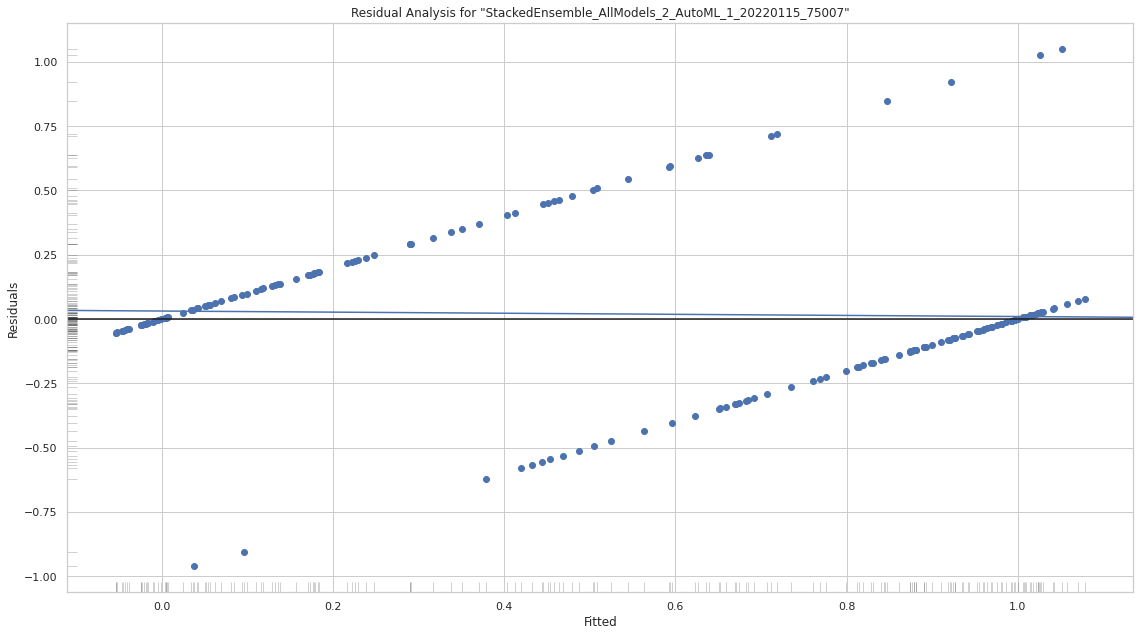

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

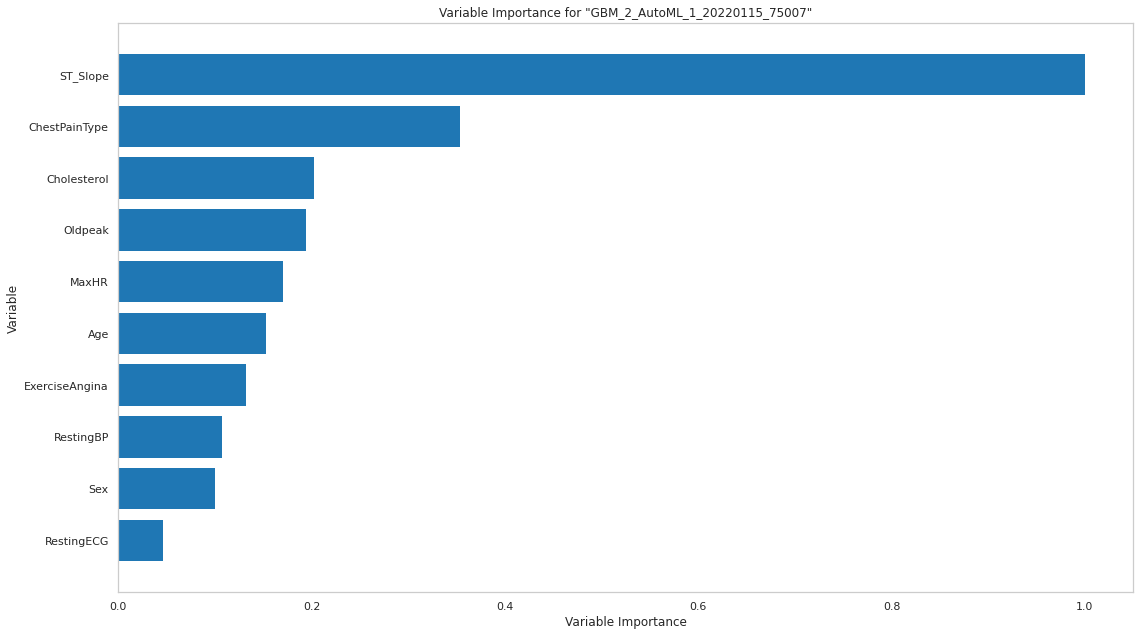

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

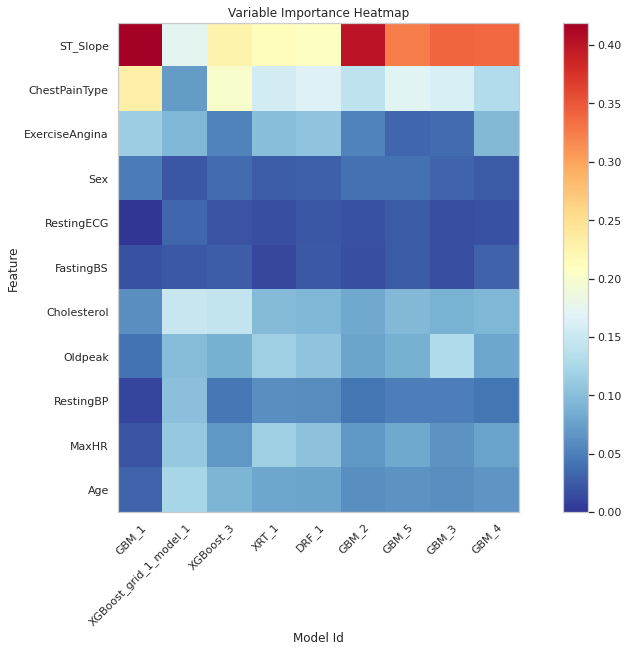

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

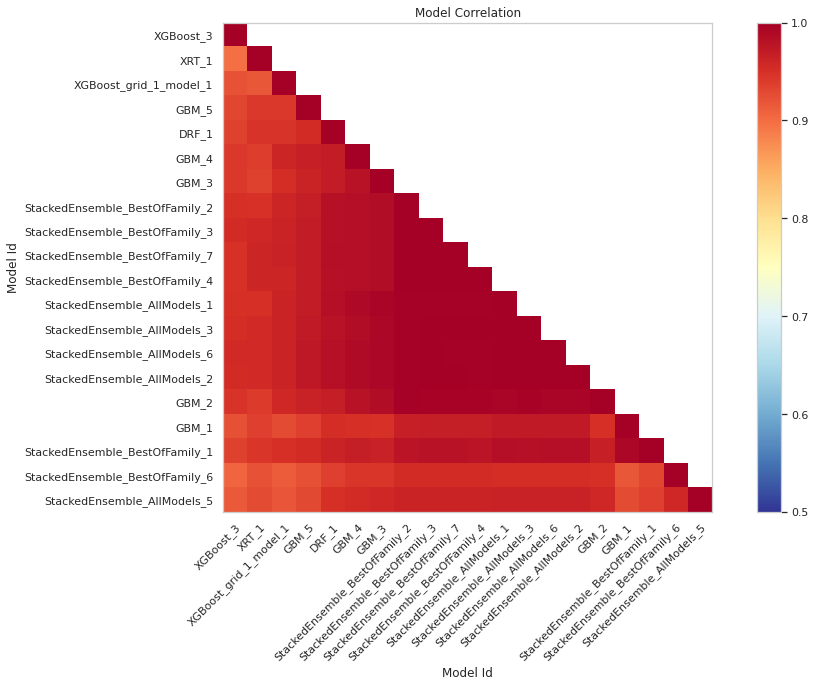

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

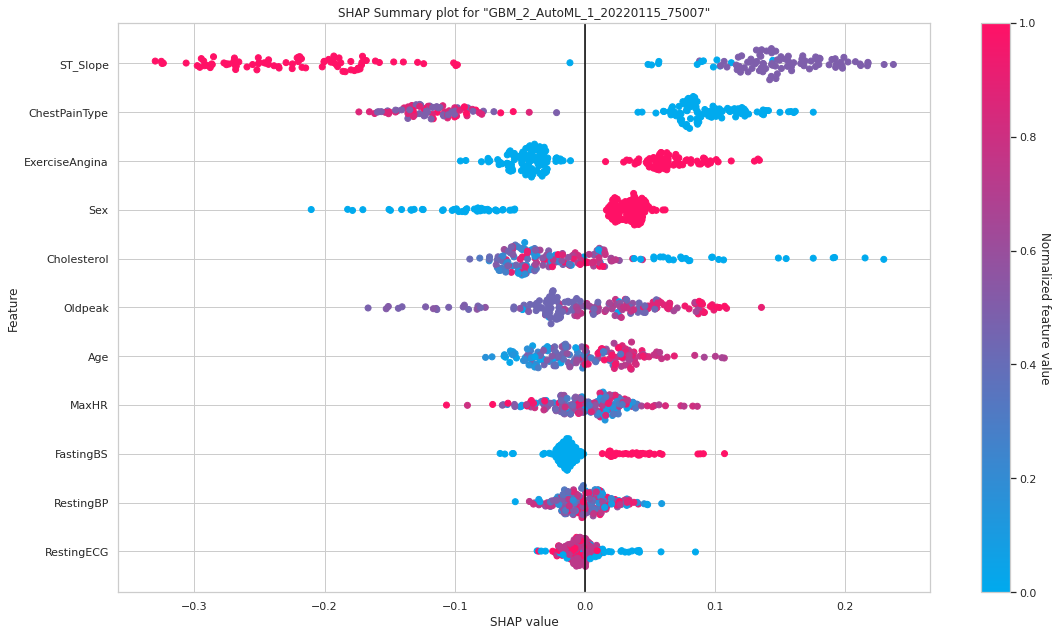

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

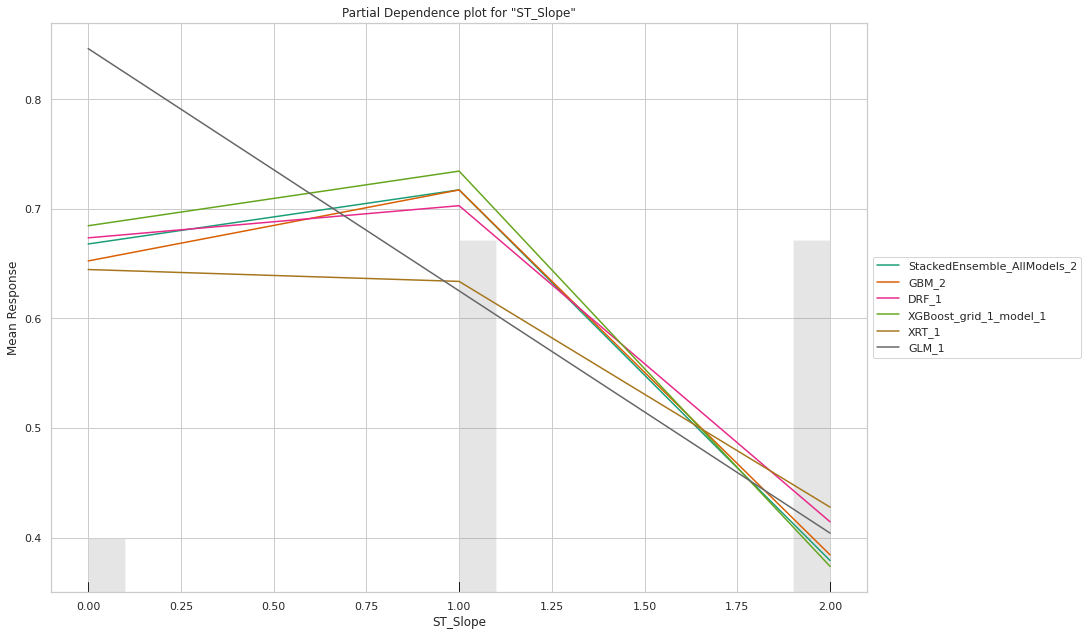

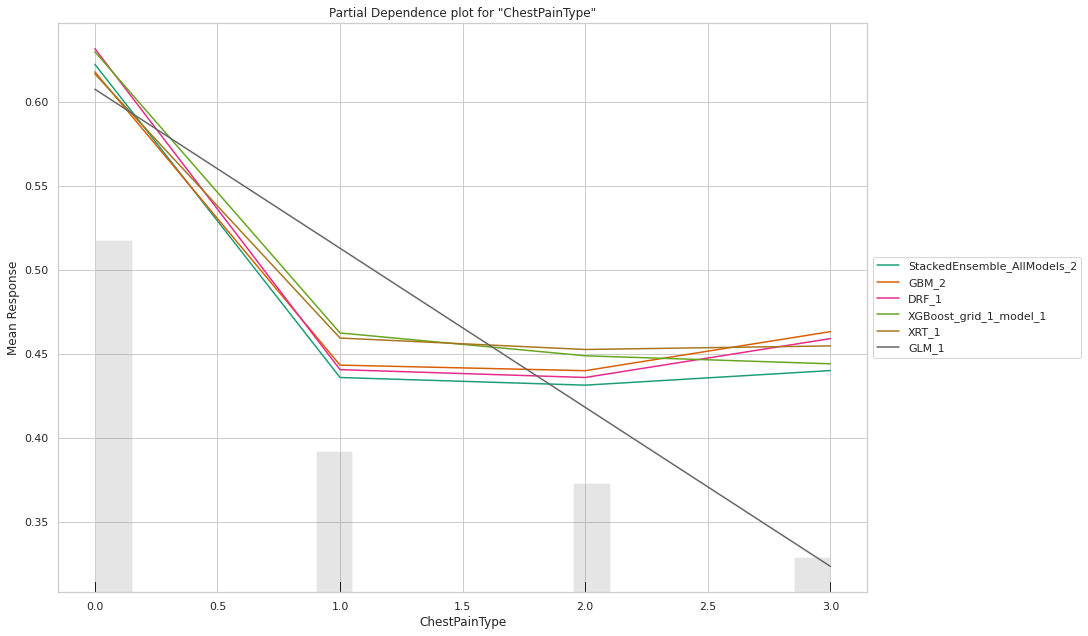

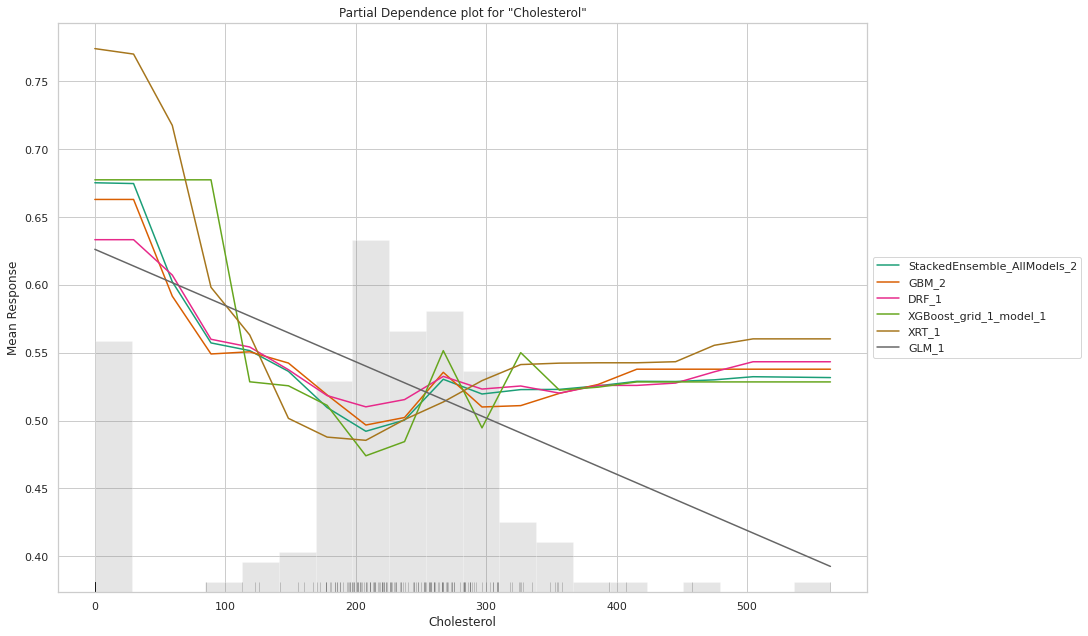

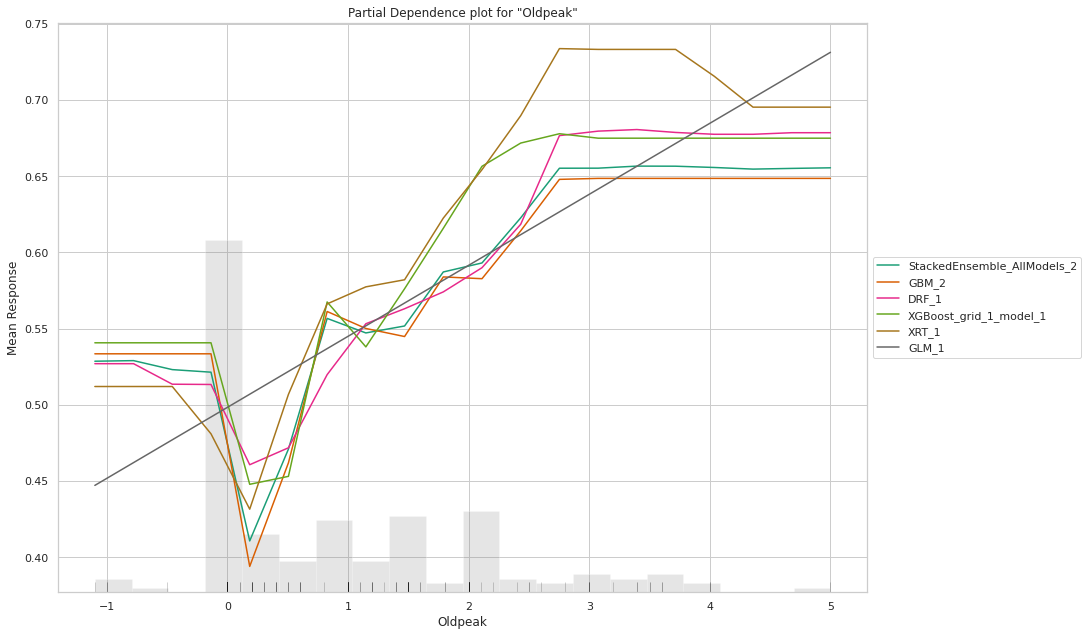

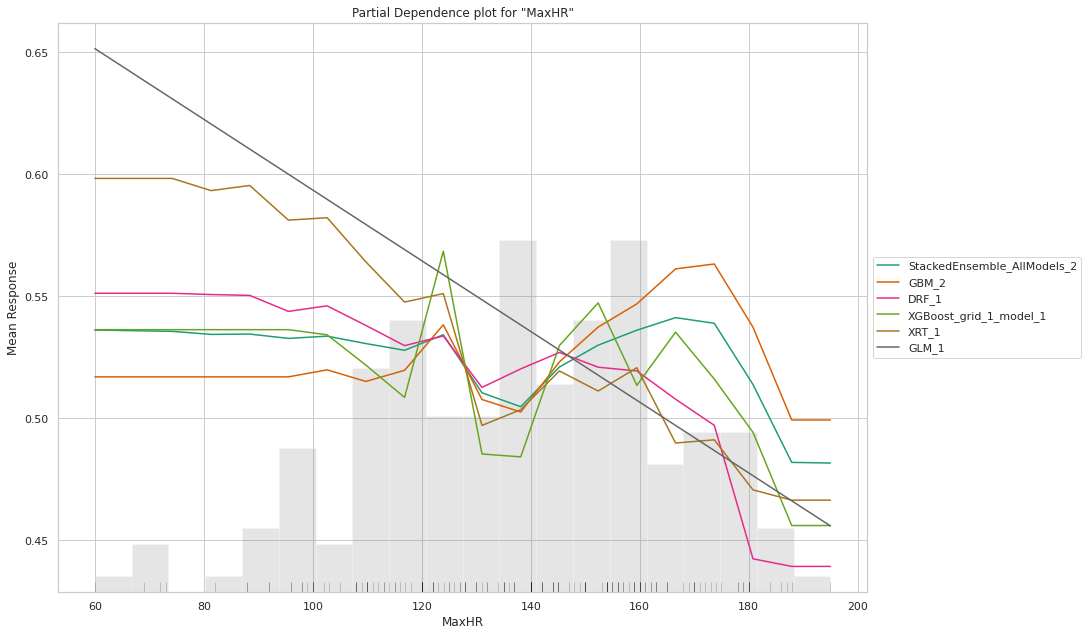

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

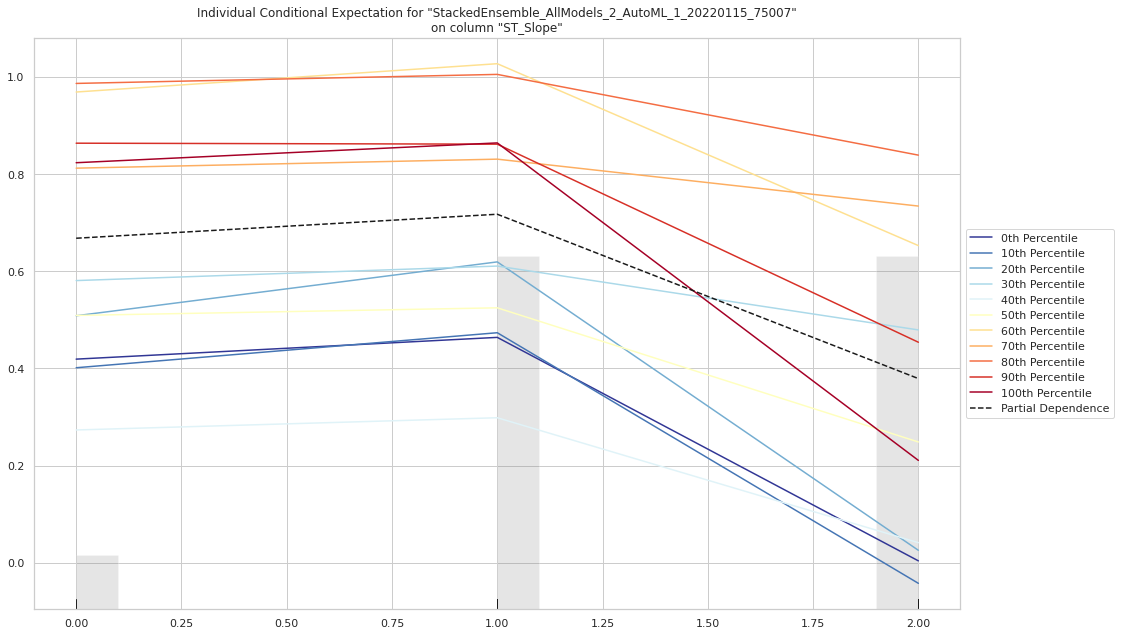

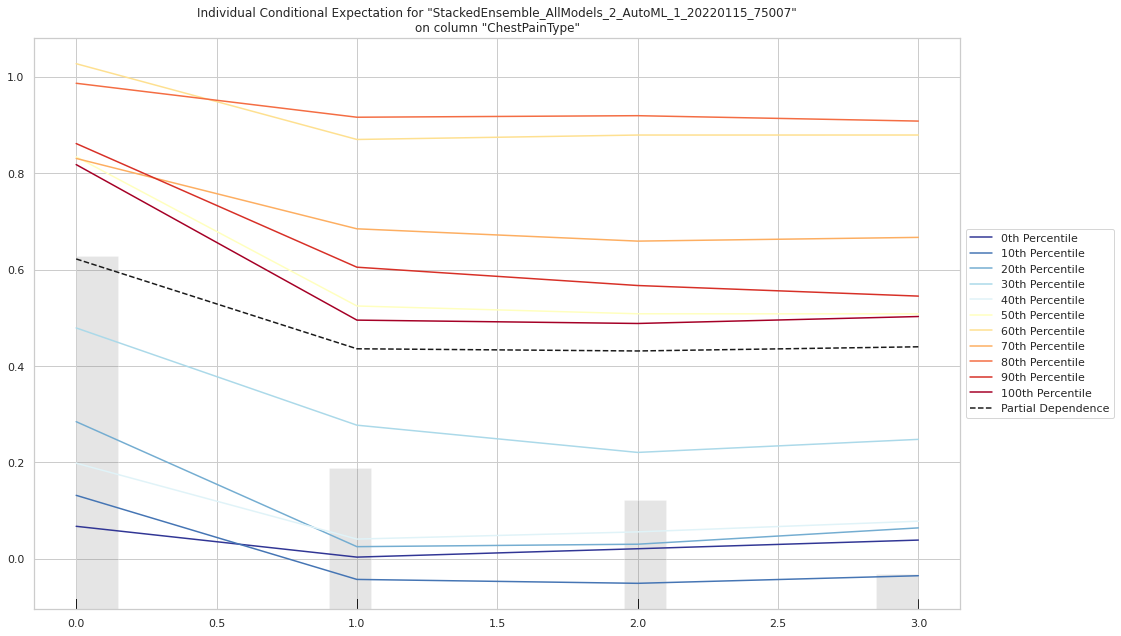

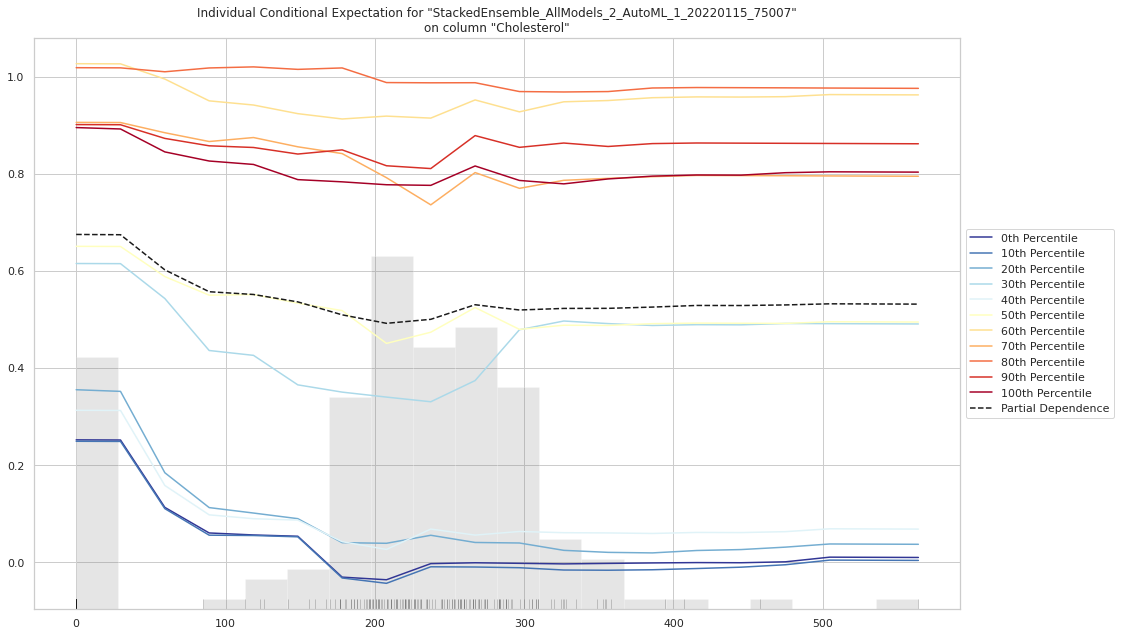

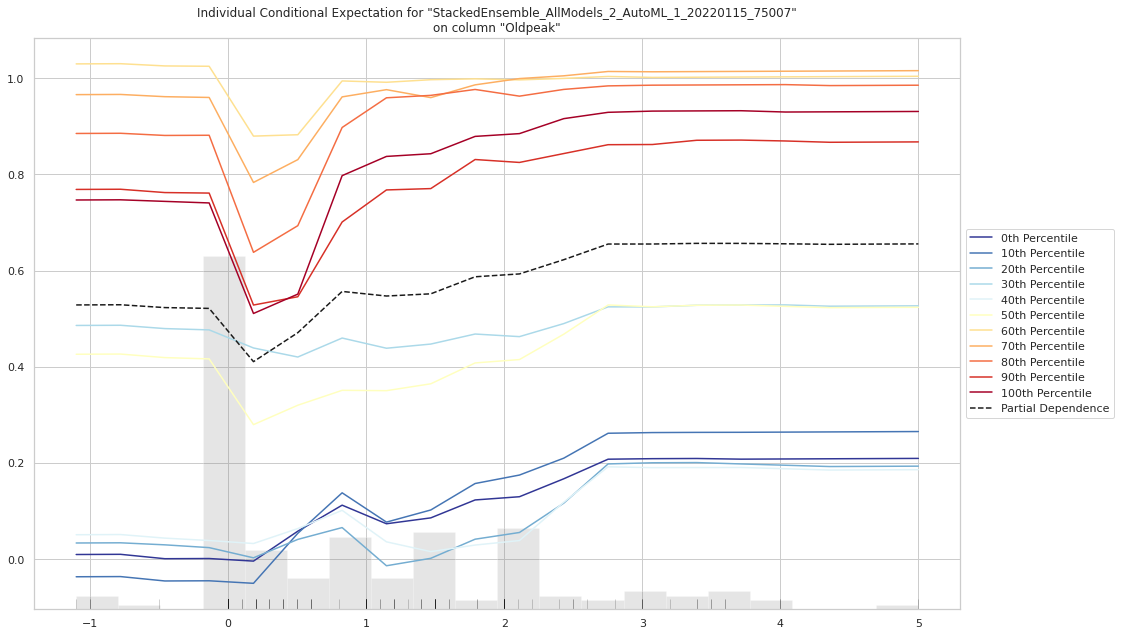

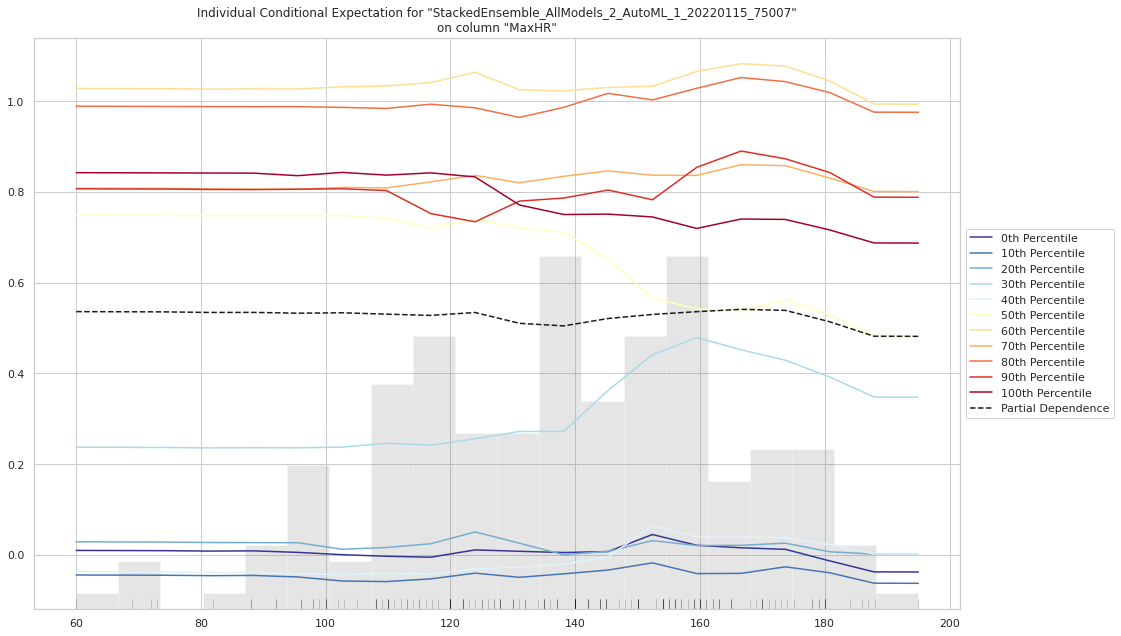

In [42]:
lb = aml.leaderboard
print(lb.head(rows = lb.nrows))

# Explain an AutoML object i.e. explain all models
exa = aml.explain(valid)


In [43]:
# Evaluate the best model with testing data.
model = aml.leader 

In [44]:
!pip install scikit-plot

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%

Testing Results of the trained model: 

Accuracy :  0.8729281767955801

Confusion Matrix :
 [[74 14]
 [ 9 84]]

Classification Report :
               precision    recall  f1-score   support

           0       0.89      0.84      0.87        88
           1       0.86      0.90      0.88        93

    accuracy                           0.87       181
   macro avg       0.87      0.87      0.87       181
weighted avg       0.87      0.87      0.87       181



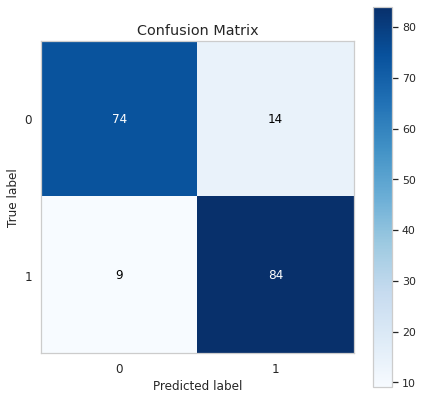

In [45]:
# For Classification
import scikitplot as skplt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import cohen_kappa_score, confusion_matrix

# Predict with the best model.
predicted_y = model.predict(valid[featureColumns])

predicted_data = predicted_y.as_data_frame()
valid_dataset = valid.as_data_frame()

# Evaluate the skill of the Trained model
acc                 = accuracy_score(valid_dataset[targetColumn], np.round(abs(predicted_data['predict'])))
classReport         = classification_report(valid_dataset[targetColumn], np.round(abs(predicted_data['predict'])))
confMatrix          = confusion_matrix(valid_dataset[targetColumn], np.round(abs(predicted_data['predict']))) 
        
print(); print('Testing Results of the trained model: ')
print(); print('Accuracy : ', acc)
print(); print('Confusion Matrix :\n', confMatrix)
print(); print('Classification Report :\n',classReport)

# Confusion matrix
skplt.metrics.plot_confusion_matrix(valid_dataset[targetColumn], np.round(abs(predicted_data['predict'])), figsize=(7,7)); plt.show()